In [ ]:
import tensorflow as tf
from keras.utils import np_utils

(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

print(X_train.shape)

print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape = (13,)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer= 'sgd', loss = 'mse')

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 30)

Epoch 1/30
13/13 [==============================] - 1s 20ms/step - loss: 236.1780 - val_loss: 84.4698
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 56.4829 - val_loss: 131.8143
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 39.3723 - val_loss: 150.9703
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 36.8025 - val_loss: 115.6345
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 34.8368 - val_loss: 29.5638
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 30.4254 - val_loss: 52.2614
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 34.4584 - val_loss: 33.8633
Epoch 8/30
13/13 [==============================] - 0s 5ms/step - loss: 37.3399 - val_loss: 20.0023
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 27.9203 - val_loss: 26.9699
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 28.2507 - val_loss: 21

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [ ]:
print(history)

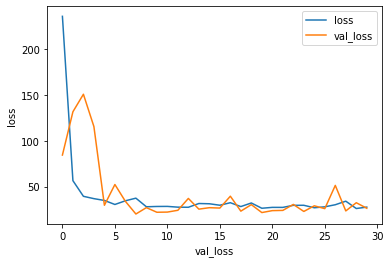

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend()


plt.show()

In [ ]:
filepath = '/content/'

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss',
                             mode = 'min',
                             save_best_only = True, 
                             verbose = 1)
callbacks_list = [checkpoint]

model.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          epochs = 15, 
          batch_size = 32, 
          callbacks = checkpoint)

Epoch 1/15
 1/13 [=>............................] - ETA: 0s - loss: 14.9444
Epoch 1: val_loss improved from inf to 26.88982, saving model to /content/
INFO:tensorflow:Assets written to: /content/assets
13/13 [==============================] - 1s 80ms/step - loss: 25.8176 - val_loss: 26.8898
Epoch 2/15
 1/13 [=>............................] - ETA: 0s - loss: 36.6374
Epoch 2: val_loss improved from 26.88982 to 26.48946, saving model to /content/
INFO:tensorflow:Assets written to: /content/assets
13/13 [==============================] - 1s 51ms/step - loss: 26.6824 - val_loss: 26.4895
Epoch 3/15
 1/13 [=>............................] - ETA: 0s - loss: 30.4265
Epoch 3: val_loss did not improve from 26.48946
13/13 [==============================] - 0s 4ms/step - loss: 29.6817 - val_loss: 32.9482
Epoch 4/15
 1/13 [=>............................] - ETA: 0s - loss: 58.1337
Epoch 4: val_loss did not improve from 26.48946
13/13 [==============================] - 0s 4ms/step - loss: 29.9435 - val

In [ ]:
len(history.history['loss'])

30

In [ ]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0, 
                          patience= 3,
                          verbose = 1, 
                          restore_best_weights=True)

In [ ]:
callbacks_list.append(earlystop)

In [ ]:
model.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          epochs = 15, 
          batch_size = 32, 
          callbacks = callbacks_list)

Epoch 1/15
 1/13 [=>............................] - ETA: 0s - loss: 24.8081
Epoch 1: val_loss did not improve from 21.87387
13/13 [==============================] - 0s 8ms/step - loss: 26.2368 - val_loss: 25.7511
Epoch 2/15
 1/13 [=>............................] - ETA: 0s - loss: 37.6388
Epoch 2: val_loss did not improve from 21.87387
13/13 [==============================] - 0s 5ms/step - loss: 30.7772 - val_loss: 31.6138
Epoch 3/15
 1/13 [=>............................] - ETA: 0s - loss: 16.4300
Epoch 3: val_loss did not improve from 21.87387
13/13 [==============================] - 0s 5ms/step - loss: 27.0447 - val_loss: 25.7484
Epoch 4/15
 1/13 [=>............................] - ETA: 0s - loss: 36.0746
Epoch 4: val_loss did not improve from 21.87387
13/13 [==============================] - 0s 5ms/step - loss: 26.2660 - val_loss: 27.4140
Epoch 5/15
 1/13 [=>............................] - ETA: 0s - loss: 31.0064
Epoch 5: val_loss did not improve from 21.87387
13/13 [=================